# Approximation of the Region of Attraction for the Van der Pol Oscillator

The van der Pol equation in reverse time (t replaced with -t) is:

\begin{align*}
 \dot{x}_1 &= -x_2 \\
 \dot{x}_2 &= x_1 + (x_1^2 - 1)x_2
 \end{align*}



/var/folders/dt/mtq4fhs94cv_nckddr346g1w0000gq/T/ipykernel_79560/1763266892.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


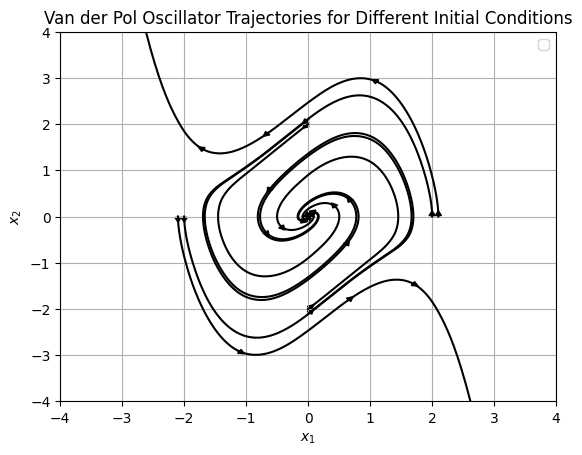

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Van der Pol oscillator
def van_der_pol_reverse(t, x, mu):
    dxdt = [-x[1], x[0] + mu*(x[0]**2 - 1) * x[1]]
    return dxdt

# Parameters
mu = 1.0
t_span = (0, 20)
dt = 0.01
# Initial conditions
initial_conditions = [[0, 2], [0, -2], [2, 0], [-2, 0]]
initial_conditions += [[2.1, 0], [-2.1, 0], [0, 2.1], [0, -2.1]]

for ic in initial_conditions:
    sol = solve_ivp(van_der_pol_reverse, t_span, ic, t_eval=np.arange(t_span[0], t_span[1], dt), args=(mu,), dense_output=True)
    plt.plot(sol.y[0], sol.y[1], 'k')
    num_arrows = 5
    arrow_indices = np.linspace(0, len(sol.y[0]) - 2, num_arrows, dtype=int)
    for idx in arrow_indices:
        plt.arrow(sol.y[0][idx], sol.y[1][idx], sol.y[0][idx+1] - sol.y[0][idx], sol.y[1][idx+1] - sol.y[1][idx], head_width=0.1, head_length=0.1, fc='k', ec='k')
    

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Van der Pol Oscillator Trajectories for Different Initial Conditions')
plt.legend()
plt.grid()
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.show()

Below is an alternative way to plot the phase diagrams

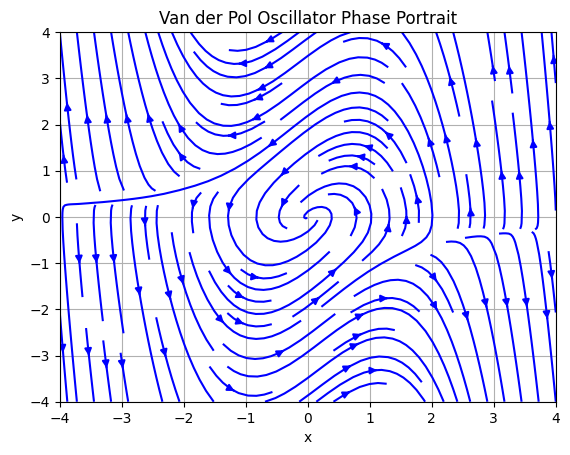

In [165]:

# Approximate the region of attraction
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
U = -Y
V = mu * (X**2 - 1) * Y +  X

plt.streamplot(X, Y, U, V, color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Van der Pol Oscillator Phase Portrait')
plt.grid()
plt.show()

Next, we will use the Lyapunov function from class and plot the contours where $\dot{V}(x) = 0$. Then, we will lso show the region of attraction that was estimated from class for $V(x) = 0.6171$. We can see that this is a vast underapproximation. 

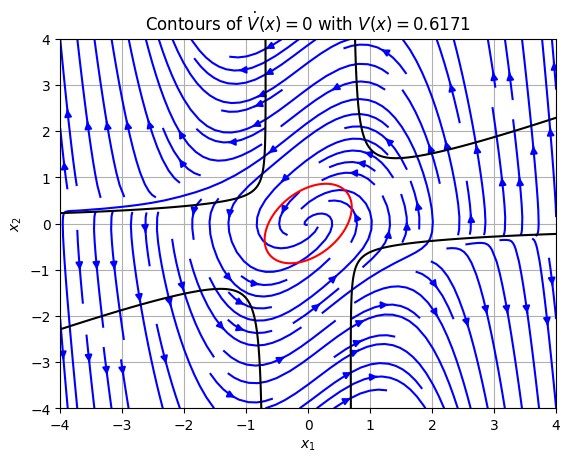

In [175]:
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
U = -Y
V = mu * (X**2 - 1) * Y +  X

# Define the function for dotV
def dotV(X, Y):
    return -(X**2 + Y**2) - (X**3 * Y - (2 * X**2 * Y**2))

def Lyap(X, Y):
    P = np.array([[1.5, -0.5], [-0.5, 1]])
    return P[0, 0] * X**2 + 2 * P[0, 1] * X * Y + P[1, 1] * Y**2

# # Calculate dotV values
dotV_values = dotV(X, Y)
Lyap_values = Lyap(X, Y)

# Plot the contours where dotV = 0
plt.streamplot(X, Y, U, V, color='b')
plt.contour(X, Y, dotV_values, levels=[0], colors='k')
plt.contour(X, Y, Lyap_values, levels=[0.6171], colors='r')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Contours of $\dot{V}(x) = 0$ with $V(x) = 0.6171$')
plt.grid()
plt.show()

A closer approximation would be to manually find the largest value of $c$ such that the level set will be within the set $\{\dot{V}(x) < 0\}$

Largest level set value: 2.307099999999995


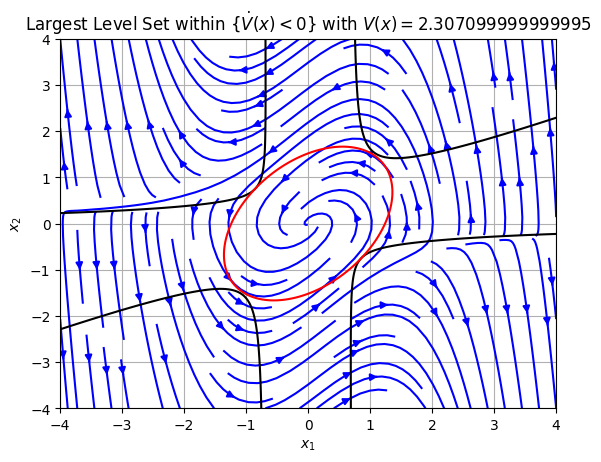

In [ ]:
def is_within_contour(level_set_value, dotV_values, Lyap_values):
    # Check if the level set is within the contour where dotV < 0
    return np.all(dotV_values[Lyap_values <= level_set_value] < 0)

# Initial level set value
level_set_value = 0.6171
increment = 0.01

# Iteratively find the largest level set value
while is_within_contour(level_set_value, dotV_values, Lyap_values):
    level_set_value += increment

# The largest level set value that is within the contour
largest_level_set_value = level_set_value - increment
print(f"Largest level set value: {largest_level_set_value}")

# Plot the result
plt.streamplot(X, Y, U, V, color='b')
plt.contour(X, Y, dotV_values, levels=[0], colors='k')
plt.contour(X, Y, Lyap_values, levels=[largest_level_set_value], colors='r')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Largest Level Set within $\{\dot{V}(x) < 0\}$ with $V(x) = $' + str(round(largest_level_set_value, 2)))
plt.grid()
plt.show()